## Weight Initialisation:-

# Weight Initialization

### Table of Contents

- Zero weight initialization 
- Random initialization
---
### Why do we need weight initialization techniques

- The primary aim of weight initialization techniques in neural networks is to avoid issues such as exploding or vanishing gradients during forward propagation. These problems can lead to excessively large or small loss gradients, which may impede the network's ability to converge to an optimal solution. By selecting appropriate weight initialization methods, we can ensure that the network converges to the desired level of performance in the shortest possible time using gradient descent optimization. If the weights are not initialized properly, it may become impossible to achieve convergence to a minimum using gradient descent.

### Zero weight initialization

- When all the weights in a neural network are initialized to zero, the derivative with respect to the loss function is the same for every weight in the network's weight matrix. As a result, all the weights take on the same value in subsequent iterations, making the hidden layers symmetric. This process continues for all the iterations, resulting in a neural network that is no better than a linear model. It is important to note that setting biases to zero does not cause any issues since non-zero weights break the symmetry, and even if the bias is zero, the values in each neuron will still be different.

### Random initialization

- Random weight initialization is a technique used to initialize the weights of neural network connections with random values in a specific range. The idea behind this technique is to break the symmetry of weights and prevent vanishing or exploding gradients during the training process.

The most commonly used method for random weight initialization is to generate weights from a normal distribution with a mean of 0 and a standard deviation of 1. This means that the weights are randomly initialized with values centred around 0 and spread out within a certain range.

However, this method can result in weights that are too small or too large, which can slow down the learning process or cause numerical instability. Therefore, a more commonly used approach is to scale the randomly generated weights by a factor that depends on the number of input and output connections for each neuron.

### Weight initialization for sigmoid and tanh

1) **Xavier Glorot weight initialization**
2) **Normalized Xavier Glorot weight initialization**
### Xavier Glorot weight initialization

- Xavier weight initialization, also known as Glorot initialization, is a technique for initializing the weights of a neural network. The objective of this technique is to prevent the vanishing or exploding gradient problem during the training of the network. The idea behind Xavier weight initialization is to set the initial weights in such a way that the variance of the outputs of each neuron is the same as the variance of its inputs. This ensures that the gradients do not vanish or explode as they propagate through the network during backpropagation.

- The formula for Xavier weight initialization for a layer with n inputs and m outputs is:

```python
W = np.random.randn(n, m) * np.sqrt(1/n)
```

- where W is the weight matrix for the layer, np.random.randn(n, m) generates a matrix of random numbers with a normal distribution, and np.sqrt(1/n) scales the random numbers to ensure that the variance of the outputs of each neuron is the same as the variance of its inputs.

- Here, the factor 1/n is used because we want the variance of the outputs to be proportional to the number of inputs. This ensures that the variance of the gradients with respect to the inputs is roughly the same for each layer, which helps prevent the gradients from vanishing or exploding.

- Let's consider an example to understand Xavier weight initialization better. Suppose we have a neural network with an input layer of size 1000, a hidden layer of size 500, and an output layer of size 10. We can initialize the weights of the hidden layer using Xavier weight initialization as follows:

```python
W1 = np.random.randn(1000, 500) * np.sqrt(1/1000)
W2 = np.random.randn(500, 10) * np.sqrt(1/500)
```

- Here, W1 is the weight matrix for the hidden layer with 1000 inputs and 500 outputs, and W2 is the weight matrix for the output layer with 500 inputs and 10 outputs. The np.sqrt(1/n) term ensures that the variance of the outputs of each neuron is the same as the variance of its inputs.

- By using Xavier weight initialization, we can ensure that the network trains faster and achieves better accuracy compared to random weight initialization or zero weight initialization.

### Normalized Xavier Glorot weight initialization

Normalized Xavier weight initialization is a variation of the Xavier weight initialization technique that is designed to work better with activation functions that have a range that is not centred around 0. This technique takes into account the scale of the activation function and normalizes the weight initialization accordingly.

In the normalized Xavier initialization, the variance of the weights is still defined as $\frac{1}{n_{in}}$, where $n_{in}$ is the number of neurons in the input layer. However, the weights are then scaled by a factor of $\sqrt{\frac{2}{n_{in}+n_{out}}}$, where $n_{out}$ is the number of neurons in the output layer.

The derivation of this formula is similar to that of the Xavier initialization, but takes into account the non-zero mean of the activation function. The goal is to initialize the weights such that the inputs to each activation function have approximately zero mean and unit variance, regardless of the specific activation function being used.

### Weight Initialization for ReLU

#### He Weight Initialization

- He Weight Initialization is a weight initialization technique used in neural networks. It is an improvement over the Xavier initialization method and is commonly used in deep neural networks that use the ReLU activation function.

- The basic idea behind He initialization is to initialize the weights of each neuron in the network with random values drawn from a Gaussian distribution with a mean of 0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the neuron.

- The formula for He initialization is given as:

W ~ N(0, sqrt(2/n))

Where,
W - weight matrix
N - normal distribution
0 - mean
sqrt(2/n) - standard deviation

- The factor of sqrt(2/n) in the standard deviation helps to maintain a balance between the variance of the activations and the variance of the gradients in the network, preventing vanishing or exploding gradients.

- He initialization is effective for networks that use the ReLU activation function, as it helps to address the problem of vanishing gradients that can occur when using a small initial weight range with ReLU.

### Table for choosing weight initialization technique based on the Activation function

|Authors| Initialization |Activation function |
|--|--|--|
|Xavier Glorot and yoshna benjio| Glorot| tanh,sigmoid,softmax|
|kaiming He | He | Relu and its variants|

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization

In [31]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

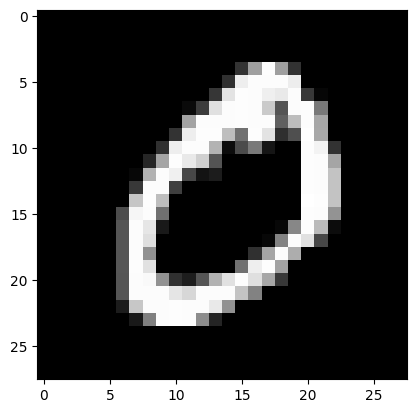

In [32]:
plt.imshow(X_train[1],cmap="gray")

In [33]:
x_valid,x_train=X_train[:5000]/255.,X_train[5000:]/255.
y_valid,y_train=Y_train[:5000],Y_train[5000:]
x_test=X_test/255.
y_test=Y_test

In [34]:
LAYERS=[
    keras.layers.Flatten(input_shape=[28,28],name="inputlayers"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,activation="relu",name="HiddenLayer1",kernel_regularizer=keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal(seed =None)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation="relu",name="HiddenLayer2",kernel_regularizer=keras.regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.HeNormal(seed =None)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="softmax",name="Outputlayer"),
]

In [35]:
model=Sequential(LAYERS)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayers (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=30,batch_size=128)

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8761 - loss: 4.0543 - val_accuracy: 0.9524 - val_loss: 0.4447
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9505 - loss: 0.3824 - val_accuracy: 0.9586 - val_loss: 0.3275
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9536 - loss: 0.3288 - val_accuracy: 0.9596 - val_loss: 0.3180
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9586 - loss: 0.3104 - val_accuracy: 0.9572 - val_loss: 0.3093
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9590 - loss: 0.3040 - val_accuracy: 0.9638 - val_loss: 0.3040
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9615 - loss: 0.2975 - val_accuracy: 0.9568 - val_loss: 0.3171
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9620 - loss: 0.3000 - val_accuracy: 0.9696 - val_loss: 0.2858
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9646 - loss: 0.2854 - val_accuracy: 0